In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
print('Setup Complete')

Setup Complete


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
wnw_data=pd.read_csv('WNW.csv', index_col='Date', parse_dates=True)
wnw_data.head()

,WWE NXT,AEW Dynamite,Unnamed: 3
Date,,,
2019-10-02,891000,1409000,NaN
2019-10-09,790000,1140000,NaN
2019-10-16,712000,1014000,NaN
2019-10-23,698000,963000,NaN
2019-10-30,580000,759000,NaN


In [3]:
cols_with_missing = [col for col in wnw_data.columns
                     if wnw_data[col].isnull().any()]
reduced_wnw_data = wnw_data.drop(cols_with_missing, axis=1)
reduced_wnw_data.head()

,WWE NXT,AEW Dynamite
Date,,
2019-10-02,891000,1409000
2019-10-09,790000,1140000
2019-10-16,712000,1014000
2019-10-23,698000,963000
2019-10-30,580000,759000


NOTE: Due to Christmas, AEW Dynamite did not aired on Wednesday, 25th December 2019. Hence the battle of the ratings was extempted for that day & hence, excluded from this plot.


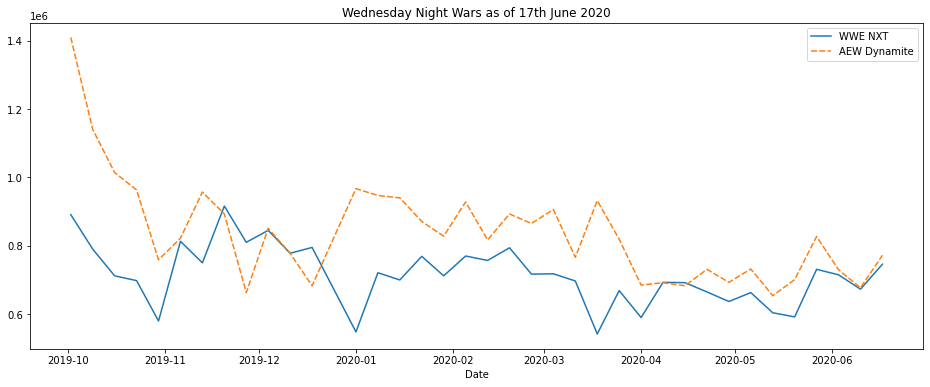

In [4]:
plt.figure(figsize=(16,6))
plt.title('Wednesday Night Wars as of 17th June 2020')
sns.lineplot(data=reduced_wnw_data)
print('NOTE: Due to Christmas, AEW Dynamite did not aired on Wednesday, 25th December 2019. Hence the battle of the ratings was extempted for that day & hence, excluded from this plot.')

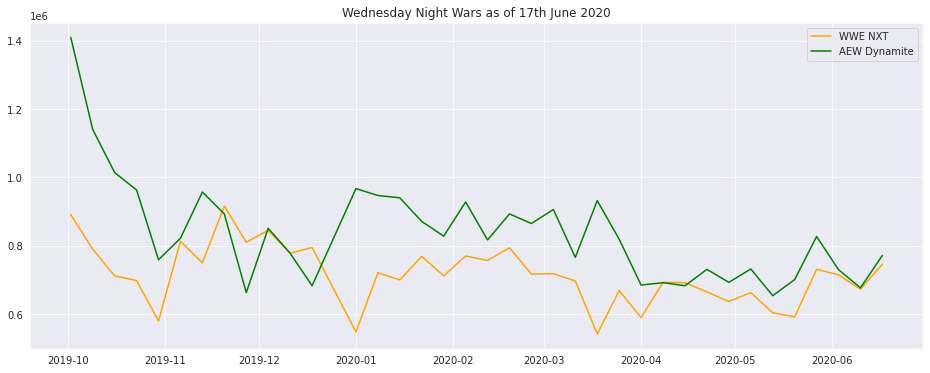

In [5]:
sns.set_style("darkgrid")
plt.figure(figsize=(16,6))
plt.title('Wednesday Night Wars as of 17th June 2020')
sns.lineplot(data=reduced_wnw_data['WWE NXT'], label='WWE NXT', color='orange')
sns.lineplot(data=reduced_wnw_data['AEW Dynamite'], label='AEW Dynamite', color='green')

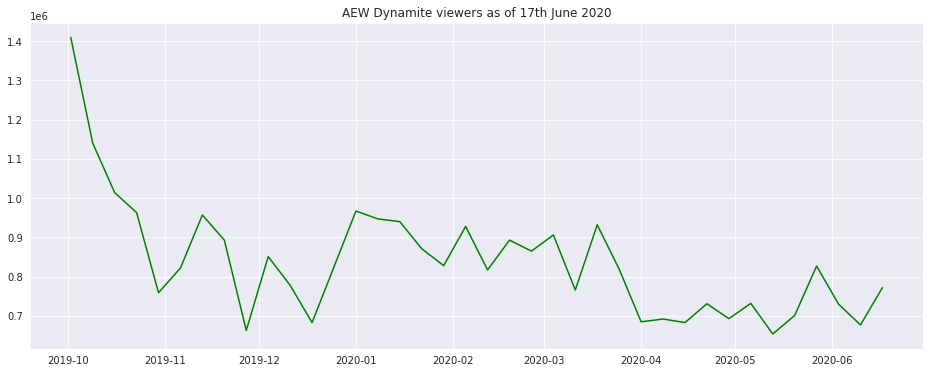

In [6]:
plt.figure(figsize=(16,6))
#plt.title('WWE NXT viewers as of 17th June 2020')
plt.title('AEW Dynamite viewers as of 17th June 2020')
#sns.lineplot(data=reduced_wnw_data['WWE NXT'], color='orange')
sns.lineplot(data=reduced_wnw_data['AEW Dynamite'], color='green')

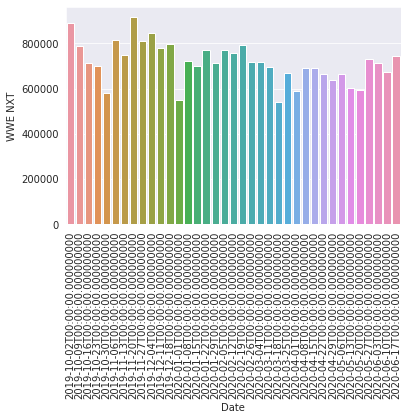

In [7]:
plt.xticks(rotation=90) 
sns.barplot(x=reduced_wnw_data.index, y=reduced_wnw_data['WWE NXT'])

In [8]:
reduced_wnw_data.index=pd.to_datetime(reduced_wnw_data.index)
reduced_wnw_data.index

DatetimeIndex(['2019-10-02', '2019-10-09', '2019-10-16', '2019-10-23',
               '2019-10-30', '2019-11-06', '2019-11-13', '2019-11-20',
               '2019-11-27', '2019-12-04', '2019-12-11', '2019-12-18',
               '2020-01-01', '2020-01-08', '2020-01-15', '2020-01-22',
               '2020-01-29', '2020-02-05', '2020-02-12', '2020-02-19',
               '2020-02-26', '2020-03-04', '2020-03-11', '2020-03-18',
               '2020-03-25', '2020-04-01', '2020-04-08', '2020-04-15',
               '2020-04-22', '2020-04-29', '2020-05-06', '2020-05-13',
               '2020-05-20', '2020-05-27', '2020-06-03', '2020-06-10',
               '2020-06-17'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [9]:
Tdate = reduced_wnw_data.index.to_series().apply(lambda x: dt.datetime.strftime(x, '%d-%b-%Y'))
Tdate

Date
2019-10-02    02-Oct-2019
2019-10-09    09-Oct-2019
2019-10-16    16-Oct-2019
2019-10-23    23-Oct-2019
2019-10-30    30-Oct-2019
2019-11-06    06-Nov-2019
2019-11-13    13-Nov-2019
2019-11-20    20-Nov-2019
2019-11-27    27-Nov-2019
2019-12-04    04-Dec-2019
2019-12-11    11-Dec-2019
2019-12-18    18-Dec-2019
2020-01-01    01-Jan-2020
2020-01-08    08-Jan-2020
2020-01-15    15-Jan-2020
2020-01-22    22-Jan-2020
2020-01-29    29-Jan-2020
2020-02-05    05-Feb-2020
2020-02-12    12-Feb-2020
2020-02-19    19-Feb-2020
2020-02-26    26-Feb-2020
2020-03-04    04-Mar-2020
2020-03-11    11-Mar-2020
2020-03-18    18-Mar-2020
2020-03-25    25-Mar-2020
2020-04-01    01-Apr-2020
2020-04-08    08-Apr-2020
2020-04-15    15-Apr-2020
2020-04-22    22-Apr-2020
2020-04-29    29-Apr-2020
2020-05-06    06-May-2020
2020-05-13    13-May-2020
2020-05-20    20-May-2020
2020-05-27    27-May-2020
2020-06-03    03-Jun-2020
2020-06-10    10-Jun-2020
2020-06-17    17-Jun-2020
Name: Date, dtype: object

In [10]:
TDate= pd.DataFrame(Tdate)
TDate.head()

,Date
Date,
2019-10-02,02-Oct-2019
2019-10-09,09-Oct-2019
2019-10-16,16-Oct-2019
2019-10-23,23-Oct-2019
2019-10-30,30-Oct-2019


In [11]:
reduced_wnw_data1=reduced_wnw_data.assign(Telecasting_Date=Tdate)
reduced_wnw_data1

,WWE NXT,AEW Dynamite,Telecasting_Date
Date,,,
2019-10-02,891000,1409000,02-Oct-2019
2019-10-09,790000,1140000,09-Oct-2019
2019-10-16,712000,1014000,16-Oct-2019
2019-10-23,698000,963000,23-Oct-2019
2019-10-30,580000,759000,30-Oct-2019
2019-11-06,813000,822000,06-Nov-2019
2019-11-13,750000,957000,13-Nov-2019
2019-11-20,916000,893000,20-Nov-2019
2019-11-27,810000,663000,27-Nov-2019


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


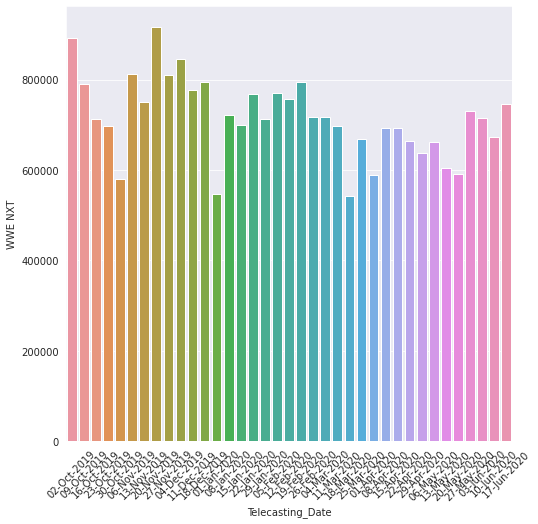

In [12]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=45) 
sns.barplot(x=reduced_wnw_data1['Telecasting_Date'], y=reduced_wnw_data1['WWE NXT'])

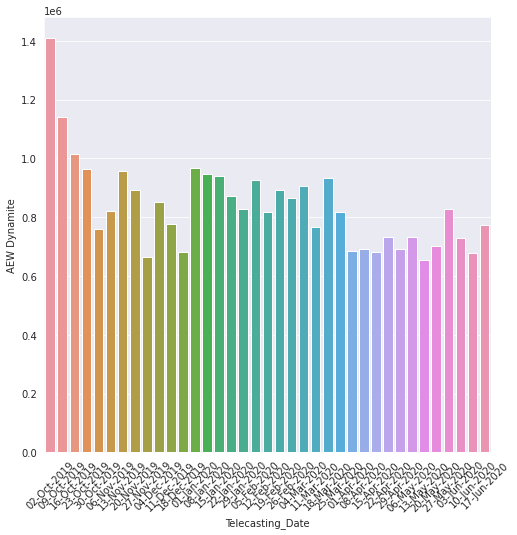

In [13]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=45) 
sns.barplot(x=reduced_wnw_data1['Telecasting_Date'], y=reduced_wnw_data1['AEW Dynamite'])

In [14]:
df1 = reduced_wnw_data1.transpose()
df1 = df1.iloc[:2]
df1

Date,2019-10-02,2019-10-09,2019-10-16,2019-10-23,2019-10-30,2019-11-06,2019-11-13,2019-11-20,2019-11-27,2019-12-04,2019-12-11,2019-12-18,2020-01-01,2020-01-08,2020-01-15,2020-01-22,2020-01-29,2020-02-05,2020-02-12,2020-02-19,2020-02-26,2020-03-04,2020-03-11,2020-03-18,2020-03-25,2020-04-01,2020-04-08,2020-04-15,2020-04-22,2020-04-29,2020-05-06,2020-05-13,2020-05-20,2020-05-27,2020-06-03,2020-06-10,2020-06-17
WWE NXT,891000,790000,712000,698000,580000,813000,750000,916000,810000,845000,778000,795000,548000,721000,700000,769000,712000,770000,757000,794000,717000,718000,697000,542000,669000,590000,693000,692000,665000,637000,663000,604000,592000,731000,715000,673000,746000
AEW Dynamite,1409000,1140000,1014000,963000,759000,822000,957000,893000,663000,851000,778000,683000,967000,947000,940000,871000,828000,928000,817000,893000,865000,906000,766000,932000,819000,685000,692000,683000,731000,693000,732000,654000,701000,827000,730000,677000,772000


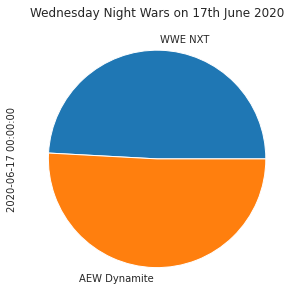

In [15]:
df2 = df1['2020-06-17']
df2.plot(kind = 'pie', figsize = (15,5))
plt.title('Wednesday Night Wars on 17th June 2020')
plt.show()

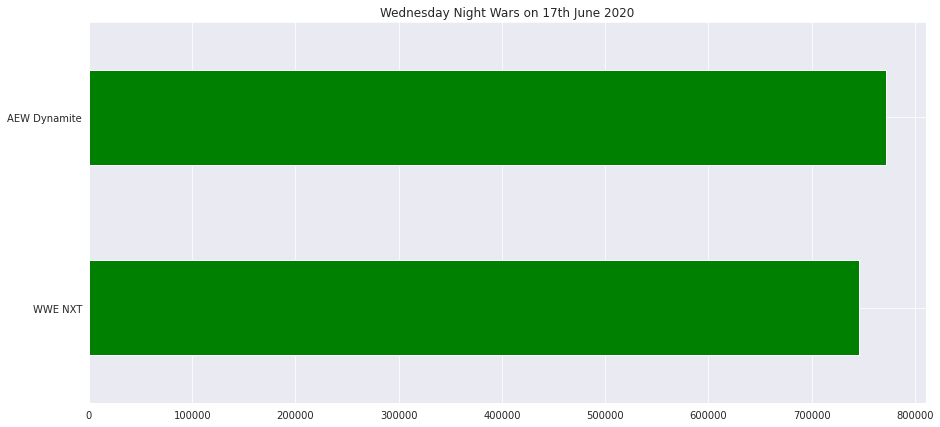

In [16]:
df3=df1['2020-06-17']
df3.plot(kind = 'barh', figsize = (15,7), color='green')
plt.title('Wednesday Night Wars on 17th June 2020')
plt.show()

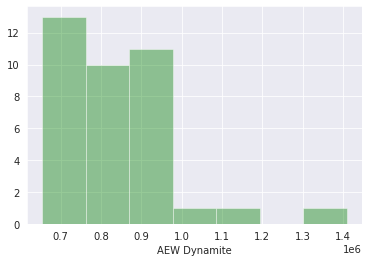

In [17]:
# Histogram 
sns.distplot(a=reduced_wnw_data1['AEW Dynamite'], kde=False, color='green')

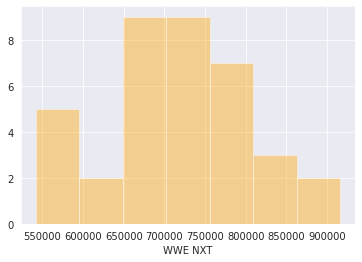

In [18]:
sns.distplot(a=reduced_wnw_data1['WWE NXT'], kde=False, color='orange')

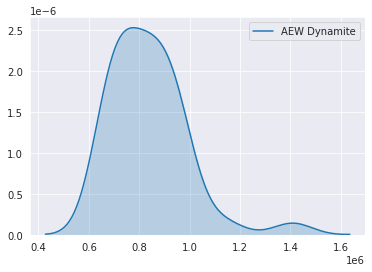

In [19]:
sns.kdeplot(data=reduced_wnw_data1['AEW Dynamite'], shade=True)
#sns.kdeplot(data=reduced_wnw_data1['AEW Dynamite'], shade=True, color='green')

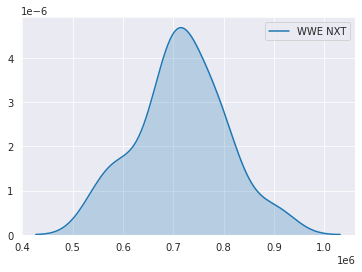

In [20]:
sns.kdeplot(data=reduced_wnw_data1['WWE NXT'], shade=True)
#sns.kdeplot(data=reduced_wnw_data1['WWE NXT'], shade=True, color='orange')

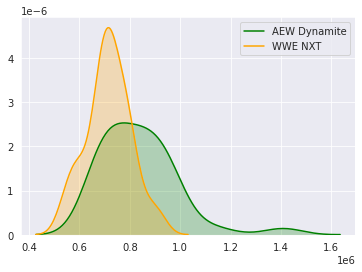

In [21]:
sns.kdeplot(data=reduced_wnw_data1['AEW Dynamite'], shade=True, color='green')
sns.kdeplot(data=reduced_wnw_data1['WWE NXT'], shade=True, color='orange')

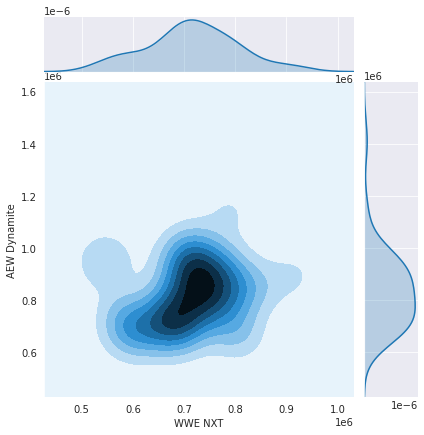

In [22]:
sns.jointplot(x=reduced_wnw_data1['WWE NXT'], y=reduced_wnw_data1['AEW Dynamite'], kind="kde")


In [23]:
print(str(len(reduced_wnw_data1['WWE NXT']))+" "+str(len(reduced_wnw_data1['AEW Dynamite'])))

37 37


In [26]:
reduced_wnw_data1.iloc[36,1]

772000

In [25]:
reduced_wnw_data1.loc["2020-06-17","AEW Dynamite"]

772000

In [27]:
reduced_wnw_data.loc[reduced_wnw_data["WWE NXT"]<reduced_wnw_data["AEW Dynamite"], "Winner Show"]="AEW Dynamite"
reduced_wnw_data.loc[reduced_wnw_data["WWE NXT"]>reduced_wnw_data["AEW Dynamite"], "Winner Show"]="WWE NXT"
reduced_wnw_data.loc[reduced_wnw_data["WWE NXT"]==reduced_wnw_data["AEW Dynamite"], "Winner Show"]="Tie"

reduced_wnw_data.loc[reduced_wnw_data["WWE NXT"]<=reduced_wnw_data["AEW Dynamite"], "Winner Views"]=reduced_wnw_data["AEW Dynamite"]
reduced_wnw_data.loc[reduced_wnw_data["WWE NXT"]>reduced_wnw_data["AEW Dynamite"], "Winner Views"]=reduced_wnw_data["WWE NXT"]
reduced_wnw_data

,WWE NXT,AEW Dynamite,Winner Show,Winner Views
Date,,,,
2019-10-02,891000,1409000,AEW Dynamite,1409000.0
2019-10-09,790000,1140000,AEW Dynamite,1140000.0
2019-10-16,712000,1014000,AEW Dynamite,1014000.0
2019-10-23,698000,963000,AEW Dynamite,963000.0
2019-10-30,580000,759000,AEW Dynamite,759000.0
2019-11-06,813000,822000,AEW Dynamite,822000.0
2019-11-13,750000,957000,AEW Dynamite,957000.0
2019-11-20,916000,893000,WWE NXT,916000.0
2019-11-27,810000,663000,WWE NXT,810000.0


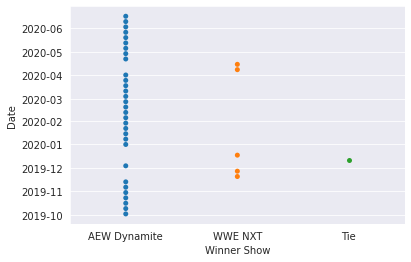

In [28]:
plt.figsize=(15,20)
sns.swarmplot(x=reduced_wnw_data['Winner Show'],
              y=reduced_wnw_data.index)

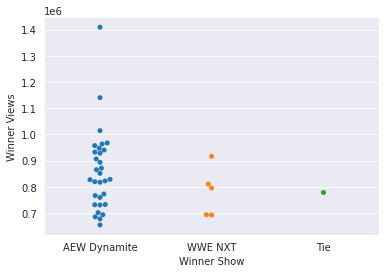

In [29]:
plt.figsize=(15,20)
sns.swarmplot(x=reduced_wnw_data['Winner Show'],
              y=reduced_wnw_data['Winner Views'])

ValueError: ignored